<a href="https://colab.research.google.com/github/is0280fp/Gait/blob/main/test_3DGRF_and_APCOP_LSTM_5class_stratified_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

# # Baseline

# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Mounted at /content/drive


In [2]:
# # StratifiedGroupKFoldの分割結果をpickle
import pickle

# test
with open("/content/drive/MyDrive/test_data/V_test.pickle", mode="rb") as f:
   test_V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_test.pickle", mode="rb") as f:
   test_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_test.pickle", mode="rb") as f:
   test_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_test.pickle", mode="rb") as f:
   test_COP_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/COP_ML_test.pickle", mode="rb") as f:
   test_COP_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/label_test.pickle", mode="rb") as f:
   test_label = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/test_data_index.pickle", mode="rb") as f:
   test_index = pickle.load(f)
f.close()

# trainig and validation
with open("/content/drive/MyDrive/test_data/V_val_train.pickle", mode="rb") as f:
   V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_val_train.pickle", mode="rb") as f:
   AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_val_train.pickle", mode="rb") as f:
   ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_val_train.pickle", mode="rb") as f:
   COP_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/COP_ML_val_train.pickle", mode="rb") as f:
   COP_ML = pickle.load(f)
f.close()

# label
with open("/content/drive/MyDrive/test_data/train_idx_list.pickle", mode="rb") as f:
   train_index_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/val_idx_list.pickle", mode="rb") as f:
   val_index_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/label_val_train.pickle", mode="rb") as f:
   label = pickle.load(f)
f.close()

In [3]:
# import os
# print(os.getcwd())

# # os.chdir("C:\\Users\\clasi\\OneDrive\\デスクトップ\\test_data\\test_data\\")
# os.chdir("C:\\Users\\mm101\\Desktop\\test_data\\")

In [4]:
# # # StratifiedGroupKFoldの分割結果をpickle
# import pickle

# # test
# with open("V_test.pickle", mode="rb") as f:
#    test_V = pickle.load(f)
# f.close()
# with open("AP_test.pickle", mode="rb") as f:
#    test_AP = pickle.load(f)
# f.close()
# with open("ML_test.pickle", mode="rb") as f:
#    test_ML = pickle.load(f)
# f.close()

# with open("COP_AP_test.pickle", mode="rb") as f:
#    test_COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_test.pickle", mode="rb") as f:
#    test_COP_ML = pickle.load(f)
# f.close()

# with open("label_test.pickle", mode="rb") as f:
#    test_label = pickle.load(f)
# f.close()

# # trainig and validation
# with open("V_val_train.pickle", mode="rb") as f:
#    V = pickle.load(f)
# f.close()
# with open("AP_val_train.pickle", mode="rb") as f:
#    AP = pickle.load(f)
# f.close()
# with open("ML_val_train.pickle", mode="rb") as f:
#    ML = pickle.load(f)
# f.close()

# with open("COP_AP_val_train.pickle", mode="rb") as f:
#    COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_val_train.pickle", mode="rb") as f:
#    COP_ML = pickle.load(f)
# f.close()

# # label
# with open("train_idx_list.pickle", mode="rb") as f:
#    train_index_list = pickle.load(f)
# f.close()

# with open("val_idx_list.pickle", mode="rb") as f:
#    val_index_list = pickle.load(f)
# f.close()

# with open("label_val_train.pickle", mode="rb") as f:
#    label = pickle.load(f)
# f.close()

# with open("test_sub_ID.pickle", mode="rb") as f:
#    sub_ID=pickle.load(f)
# f.close()

# import pandas as pd

# with open("test_data_index.pickle", mode="rb") as f:
#    test_index = pickle.load(f)
# f.close()

In [3]:
import numpy as np
print(np.where(label==0)[0].shape)
print(np.where(label==1)[0].shape)
print(np.where(label==2)[0].shape)
print(np.where(label==3)[0].shape)
print(np.where(label==4)[0].shape)

(13756,)
(11862,)
(17630,)
(18557,)
(14341,)


In [3]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler_LSTM = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1) 
mmscaler_CNN = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

# LSTM
mmscaler_LSTM.fit(V)
V = mmscaler_LSTM.transform(V)
V = V.reshape(V.shape[0], V.shape[1], 1)

mmscaler_LSTM.fit(AP)
AP = mmscaler_LSTM.transform(AP)
AP = AP.reshape(AP.shape[0], AP.shape[1], 1)

mmscaler_LSTM.fit(ML)
ML = mmscaler_LSTM.transform(ML)
ML = ML.reshape(ML.shape[0], ML.shape[1], 1)

mmscaler_LSTM.fit(COP_AP)
COP_AP = mmscaler_LSTM.transform(COP_AP)
COP_AP = COP_AP.reshape(COP_AP.shape[0], COP_AP.shape[1], 1)

mmscaler_LSTM.fit(COP_ML)
COP_ML = mmscaler_LSTM.transform(COP_ML)
COP_ML = COP_ML.reshape(COP_ML.shape[0], COP_ML.shape[1], 1)

In [4]:
!pip install keras-layer-normalization
# !pip install keras-self-attention

  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.14.0-cp37-none-any.whl size=5269 sha256=66d7f9823eb561cb0de08514914f0bd0a346a6e903dfc1ed5cce507842313ff5
  Stored in directory: /root/.cache/pip/wheels/54/80/22/a638a7d406fd155e507aa33d703e3fa2612b9eb7bb4f4fe667
Successfully built keras-layer-normalization


In [5]:
from keras import optimizers, regularizers
from keras.initializers import he_normal
from keras.layers import ELU, Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.advanced_activations import PReLU
from keras.models import Model, Sequential
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.layers.normalization import BatchNormalization
from keras_layer_normalization import LayerNormalization
# from keras_self_attention import SeqSelfAttention
import numpy as np
import keras
from sklearn.utils import class_weight

import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import datetime

NAME = "test_LSTM_3DGRF_and_APCOP_5class_stratified_group"
i = 0

# 共通
now = datetime.datetime.now()

# early stopping
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=10,
                )

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr
  
lr_scheduler = LearningRateScheduler(decay_schedule)

initializer = he_normal()

classes_main = 5

#LSTM-----------------------------------------------------------------------------------------------------------------------
def build_model():
  # LSTM
  # 最初これだけだった
  model = Sequential()
  model.add(InputLayer(input_shape=(101, 4)))

  model.add(Bidirectional(LSTM(512, return_sequences=True)))
  # model.add(LSTM(256, return_sequences=True))
  model.add(LayerNormalization())
  model.add(Activation('tanh'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())

  model.add(Dense(512, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(256, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(128, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(64, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(classes_main, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))

  model.summary()
  return model
#------------------------------------------------------------------------------------------------------------------------------------------------------

# k-fold目のモデルのval_accuracyとval_lossのログ
history = []
# 混合行列のログ
cmx_list = []
# F1などスコアのログ
report_list = []

EPOCHS = 500

val_label_list = []
train_label_list = []

val_LSTM_data_list = []
train_LSTM_data_list = []

i = 0
for i in range(7):
  train_index = train_index_list[i]
  train_LSTM_data = np.concatenate([V[train_index], AP[train_index], ML[train_index], COP_AP[train_index]], axis=2)
  val_index = val_index_list[i]
  val_LSTM_data = np.concatenate([V[val_index], AP[val_index], ML[val_index], COP_AP[val_index]], axis=2)
  
  # label
  train_label = label[train_index] 
  val_label= label[val_index] 

  # シャッフル
  p = np.random.permutation(len(train_label))
  train_LSTM_data = train_LSTM_data[p]
  train_label = train_label[p]

  MAX = len(train_LSTM_data)

  train_label = keras.utils.to_categorical(train_label, classes_main)
  val_label = keras.utils.to_categorical(val_label, classes_main)

  train_LSTM_data_list.append(train_LSTM_data)
  val_LSTM_data_list.append(val_LSTM_data)

  val_label_list.append(val_label)
  train_label_list.append(train_label)

  print("train_data", train_LSTM_data.shape)
  print("val_data", val_LSTM_data.shape)
  i = i+1

train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)
train_data (65268, 101, 4)
val_data (10878, 101, 4)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

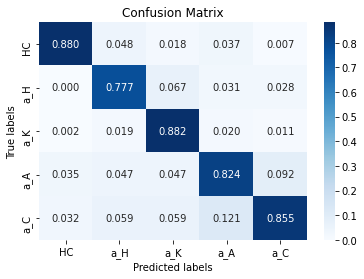

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

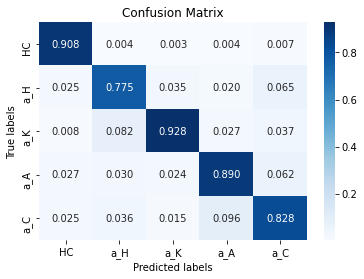

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)              

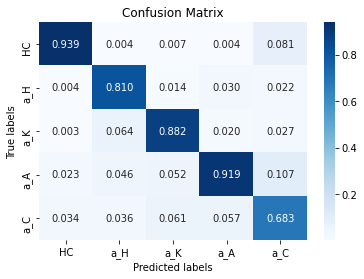

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_3 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_18 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)              

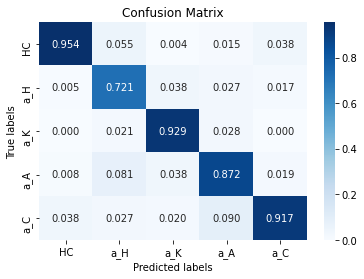

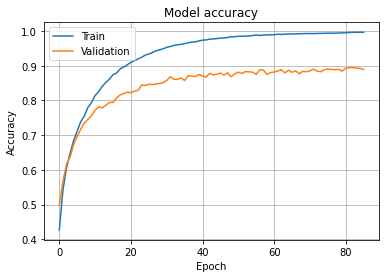

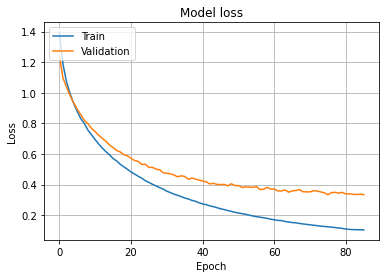

In [9]:
# for i in range(0, 7):
for i in range(3, 7):
  # checkpointの設定
  checkpoint = ModelCheckpoint(
                      filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )
  model = build_model()
  model.compile(
      loss='categorical_crossentropy',
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc']
            )
  
  # class_weights = dict(zip(np.unique(np.argmax(train_label_list[i], axis=1)), class_weight.compute_class_weight('balanced', np.unique(np.argmax(train_label_list[i], axis=1)), 
  #               np.argmax(train_label_list[i], axis=1)))) 

  # print("class_weights", class_weights)

  print("HC",np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
  print("H",np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
  print("K",np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
  print("A",np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
  print("C",np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      # class_weight=class_weights,
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "drive/MyDrive/saved_models/test/{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# with open("/content/drive/MyDrive/saved_models/StratifiedGroupFold/COP_LSTM_5class_with_both/cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("/content/drive/MyDrive/saved_models/StratifiedGroupFold/COP_LSTM_5class_with_both/classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

# now = datetime.datetime.now()

# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [6]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler_LSTM = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1) 
# mmscaler_CNN = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

# LSTM
mmscaler_LSTM.fit(test_V)
test_V = mmscaler_LSTM.transform(test_V)
test_V = test_V.reshape(test_V.shape[0], test_V.shape[1], 1)

mmscaler_LSTM.fit(test_AP)
test_AP = mmscaler_LSTM.transform(test_AP)
test_AP = test_AP.reshape(test_AP.shape[0], test_AP.shape[1], 1)

mmscaler_LSTM.fit(test_ML)
test_ML = mmscaler_LSTM.transform(test_ML)
test_ML = test_ML.reshape(test_ML.shape[0], test_ML.shape[1], 1)

mmscaler_LSTM.fit(test_COP_AP)
test_COP_AP = mmscaler_LSTM.transform(test_COP_AP)
test_COP_AP = test_COP_AP.reshape(test_COP_AP.shape[0], test_COP_AP.shape[1], 1)

mmscaler_LSTM.fit(test_COP_ML)
test_COP_ML = mmscaler_LSTM.transform(test_COP_ML)
test_COP_ML = test_COP_ML.reshape(test_COP_ML.shape[0], test_COP_ML.shape[1], 1)



In [7]:
test_x = np.concatenate([test_V[test_index], test_AP[test_index], test_ML[test_index], test_COP_AP[test_index]], axis=2)
test_y = test_label[test_index]
test_y = keras.utils.to_categorical(test_y, classes_main)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

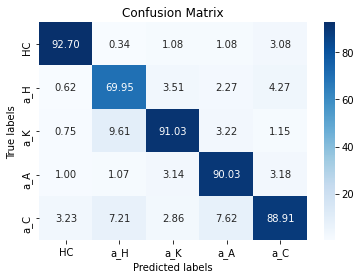

In [8]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

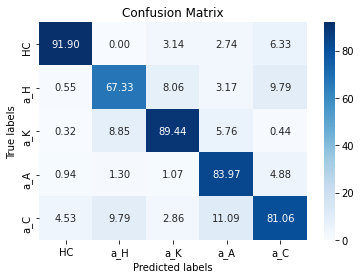

In [9]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/1fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)              

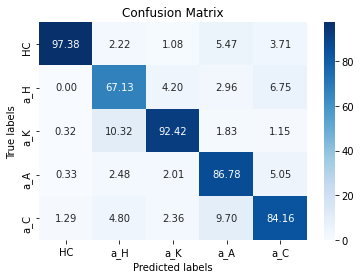

In [10]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/2fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_3 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_18 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)              

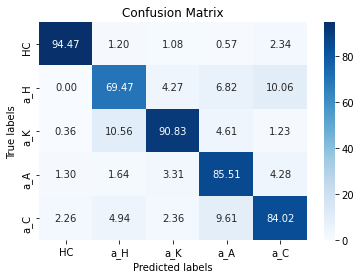

In [11]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_4 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_24 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)              

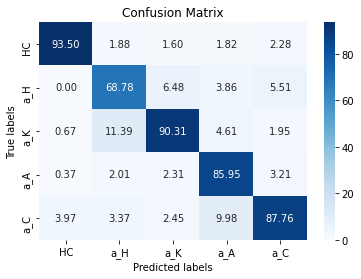

In [12]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/4fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_5 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_30 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)              

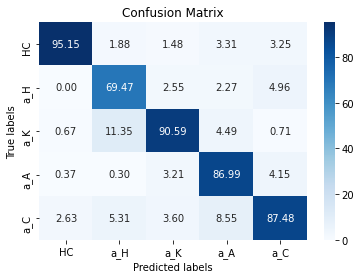

In [13]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/5fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 101, 1024)         2117632   
_________________________________________________________________
layer_normalization_6 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_36 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)              

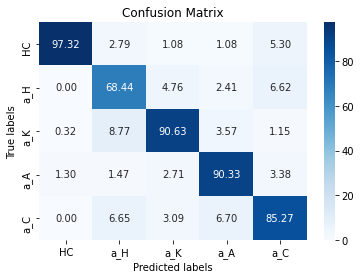

In [14]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/6fold_test_LSTM_3DGRF_and_APCOP_5class_stratified_group.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )


  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()